# Classification Model of Customers Chunk

## Import Libraries

In [1]:
# import libraries
import pandas as pd
from pycaret.classification import *
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

## Load Data

The dataset was obtained from Kaggle: [Churn Modeling](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)


In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Test if there is missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataset[['Geography']])
pd.DataFrame(le.classes_)

,0
0,France
1,Germany
2,Spain


In [5]:
dataset.Geography = le.transform(dataset.Geography)

In [6]:
le.fit(dataset.Gender)
pd.DataFrame(le.classes_)

,0
0,Female
1,Male


In [7]:
dataset.Gender = le.transform(dataset.Gender)
dataset.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

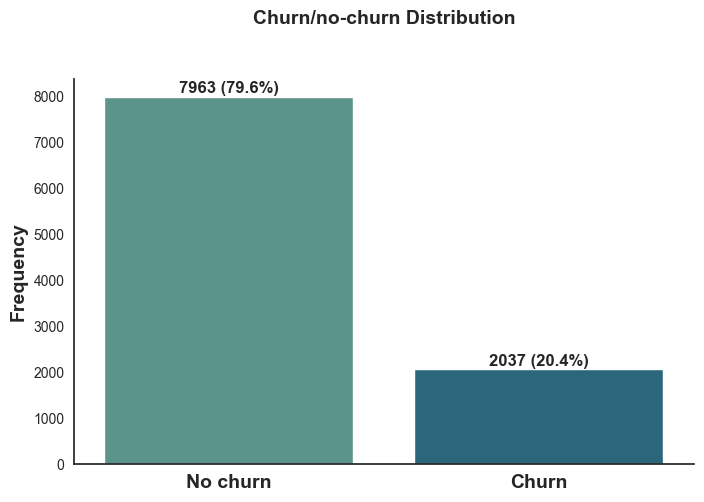

In [14]:
# Plot the distribution of Churn/no-churn
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("ticks")

sns.countplot(dataset,
            x='Exited',
            legend = False,
            hue='Exited',
            palette='crest',
            )

# label each bar in histogram
for p in ax.patches:
  height = p.get_height()
  per = height/len(dataset)
  ax.text(x = p.get_x()+(p.get_width()/2),
          y = height+100,
          s = '{:.0f} ({:.1%})'.format(height, per),
          ha = "center",
          fontweight='bold')

sns.despine()
ax.set_ylabel("Frequency", fontsize=14, fontweight="bold")
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels(['No churn', 'Churn'], fontsize=14, fontweight="bold")
ax.set_xlabel(None)
plt.title("Churn/no-churn Distribution", fontsize=14, pad=40, fontweight='bold')


plt.show()

In [12]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# Separate the Train and testing dataset
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]
y_test = test[['Exited']]
X_test = test.drop('Exited', axis=1)

train.shape , test.shape

((7945, 11), (2055, 11))

In [30]:
# Save the dataset
#train.to_csv('train_ds.csv', index=False)
#test.to_csv('test_ds.csv', index=False)
#X_test.to_csv('X_test_ds.csv', index=False)
#y_test.to_csv('y_test_ds.csv', index=False)

In [16]:
# Use the dataset already saved
train = pd.read_csv('train_ds.csv')
X_test = pd.read_csv('X_test_ds.csv')
y_test = pd.read_csv('y_test_ds.csv')

## Train and Evaluate the Model

To know more about library go to: [Pycaret](https://pycaret.gitbook.io/docs/get-started/functions/optimize)

In [22]:
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

if the next line doesn't work, and you're using a mac, maybe you should install lightgbm with this code:
conda install -c conda-forge lightgbm

In [23]:
experiment = setup(train, target = 'Exited', categorical_features=cat_features, session_id=3175, fix_imbalance=True)

,Description,Value
0,Session id,3175
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(7945, 11)"
4,Transformed data shape,"(11238, 13)"
5,Transformed train set shape,"(8854, 13)"
6,Transformed test set shape,"(2384, 13)"
7,Ordinal features,3
8,Numeric features,6
9,Categorical features,4


In [24]:
best_mod = compare_models()
best_mod

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:12:04
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8605,0.8636,0.5264,0.7146,0.6056,0.5233,0.5327,1.2430
rf,Random Forest Classifier,0.8556,0.8494,0.5009,0.7060,0.5851,0.5009,0.5122,1.0080
et,Extra Trees Classifier,0.8534,0.8482,0.4876,0.7032,0.5748,0.4900,0.5025,0.7830
lightgbm,Light Gradient Boosting Machine,0.8529,0.8594,0.5150,0.6861,0.5881,0.5008,0.5086,0.5620
ada,Ada Boost Classifier,0.8416,0.8417,0.5423,0.6296,0.5820,0.4850,0.4875,0.5240
dummy,Dummy Classifier,0.7961,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1710
dt,Decision Tree Classifier,0.7927,0.6916,0.5211,0.4940,0.5064,0.3755,0.3762,0.1950
ridge,Ridge Classifier,0.7062,0.0000,0.6834,0.3776,0.4859,0.3033,0.3303,0.1530
lda,Linear Discriminant Analysis,0.7062,0.7594,0.6834,0.3776,0.4859,0.3033,0.3303,0.1780
nb,Naive Bayes,0.6716,0.7409,0.7028,0.3485,0.4658,0.2658,0.3001,0.2210


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3175, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Get the API to see the model parameters and results
evaluate_model(best_mod)

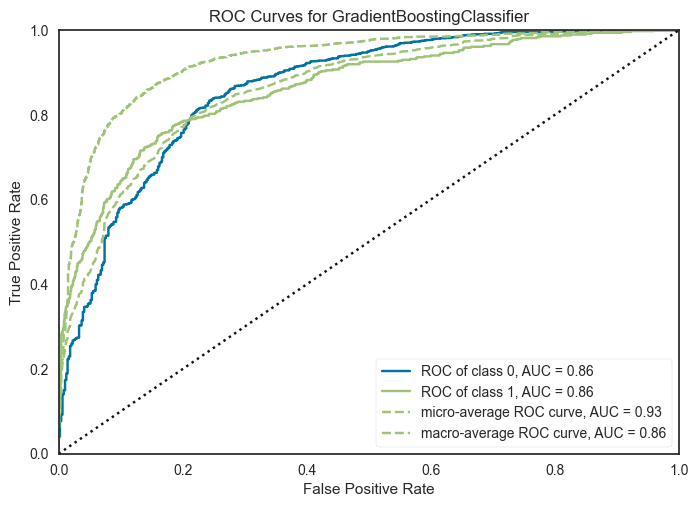

In [32]:
plot_model(best_mod, plot='auc')

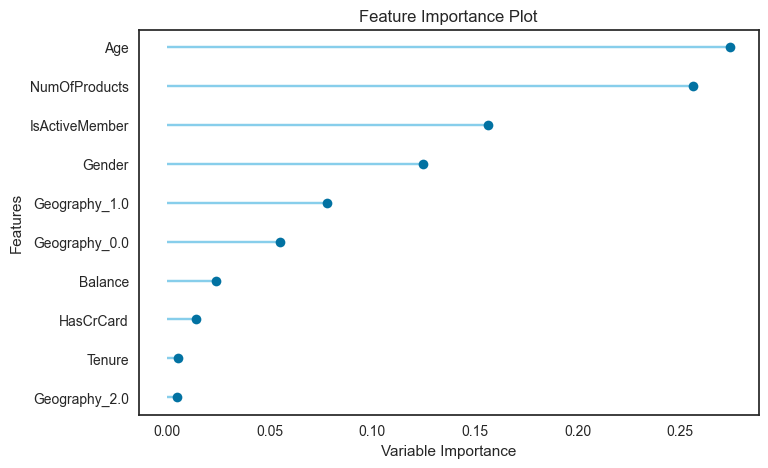

In [36]:
plot_model(best_mod, plot='feature')

See this web to get the name of plot available:
https://pycaret.readthedocs.io/en/stable/api/classification.html#pycaret.classification.plot_model


In [26]:
gbc_mod = create_model('gbc',
                       random_state=3175)
print(gbc_mod)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:14:11
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8689,0.8532,0.5439,0.7470,0.6294,0.5522,0.5625
1,0.8651,0.8780,0.5133,0.7436,0.6073,0.5292,0.5424
2,0.8543,0.8589,0.5044,0.6951,0.5846,0.4990,0.5084
3,0.8345,0.8511,0.4956,0.6154,0.5490,0.4491,0.4531
4,0.8651,0.8582,0.5310,0.7317,0.6154,0.5361,0.5462
5,0.8687,0.8740,0.5752,0.7222,0.6404,0.5613,0.5668
6,0.8507,0.8275,0.4690,0.6974,0.5608,0.4750,0.4886
7,0.8543,0.8521,0.4825,0.7143,0.5759,0.4919,0.5057
8,0.8615,0.9028,0.5439,0.7126,0.6169,0.5342,0.5415


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3175, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [33]:
# Tunning model
gbc_tun = create_model('gbc',
                       n_estimators=500,
                       learning_rate=.01,
                       subsample=.75,
                       random_state=3175)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8564,0.8509,0.5614,0.6809,0.6154,0.5281,0.5318
1,0.8597,0.8726,0.5221,0.7108,0.6020,0.5193,0.5284
2,0.8543,0.8494,0.5044,0.6951,0.5846,0.4990,0.5084
3,0.8363,0.8519,0.5133,0.6170,0.5604,0.4609,0.4638
4,0.8615,0.8527,0.5398,0.7093,0.6131,0.5306,0.5379
5,0.8705,0.8729,0.5929,0.7204,0.6505,0.5719,0.5760
6,0.8435,0.8197,0.4779,0.6585,0.5538,0.4619,0.4706
7,0.8561,0.8507,0.5000,0.7125,0.5876,0.5037,0.5153
8,0.8579,0.9015,0.5351,0.7011,0.6070,0.5221,0.5293


In [ ]:
evaluate_model(gbc_tun)

In [ ]:
gbc_tun.estimators_

## Test the Model

In [17]:
# Predicting new data
y_hat = predict_model(gbc_mod, X_test)[['prediction_label']]

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_hat)
cm

array([[1541,   97],
       [ 188,  229]])

<function matplotlib.pyplot.show(close=None, block=None)>

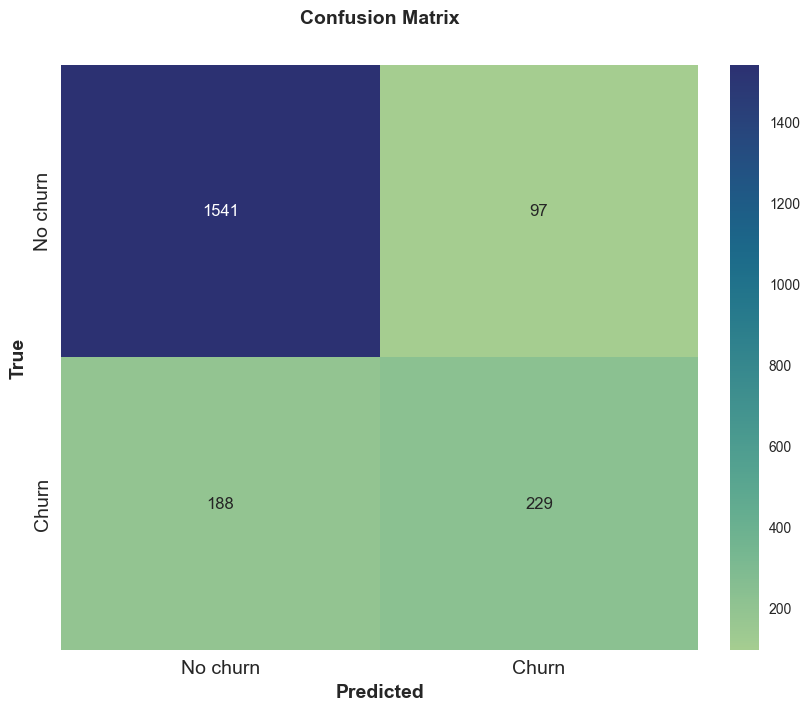

In [20]:
fig, ax = plt.subplots(layout='constrained', figsize=(8,7))
sns.set_style("ticks")

pal = sns.color_palette("crest", as_cmap="True")

sns.heatmap(cm, annot=True, cmap=pal, fmt='.0f')

ax.set_ylabel("True", fontsize=14, fontweight="bold")
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels(['No churn', 'Churn'], fontsize=14)
ax.set_yticklabels(['No churn', 'Churn'], fontsize=14)
ax.set_xlabel("Predicted",  fontsize=14, fontweight="bold")
plt.title("Confusion Matrix", fontsize=14, pad=30, fontweight='bold')
plt.show

In [34]:
# Performance Report Base Model
print(classification_report(y_test, y_hat, target_names=['Not Exited', 'Exited']))

              precision    recall  f1-score   support

  Not Exited       0.89      0.94      0.92      1638
      Exited       0.70      0.55      0.62       417

    accuracy                           0.86      2055
   macro avg       0.80      0.74      0.77      2055
weighted avg       0.85      0.86      0.85      2055



## Save and load the model

In [35]:
# Save the model
#save_model(gbc_mod, "GBC_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorica...
                                        

In [15]:
gbc_mod = load_model('GBC_model')

Transformation Pipeline and Model Successfully Loaded
